#ASSIGNMENT 3 : Entangling 3 Qubits 

This Jupyter Notebook presents my solution for Assignment 3, focusing on creating an entangled state with three qubits.

First, I import necessary components from Qiskit, specifically QuantumCircuit to build the quantum circuit, and StatevectorSampler along with Statevector to simulate the qubits and analyze their resulting state.

Following the step-by-step instructions from the course video, I've constructed the circuit to produce the desired entangled state ​1/sqrt(2)​(∣000⟩+∣111⟩). Each significant step in the code is thoroughly commented to explain the purpose of the gates and the state evolution of the qubits.

The notebook demonstrates how to design the circuit, verify the entangled state using statevector simulation, and then perform measurements to observe the outcomes, providing insights into the probabilities of finding the qubits in the ∣000⟩ or ∣111⟩ states.

In [33]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Statevector

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))
['111', '111', '111', '000', '111', '000', '111', '000', '000', '111', '111', '111', '000', '000', '000', '111', '111', '111', '000', '111', '000', '000', '111', '000', '000', '000', '111', '000', '000', '000', '111', '111', '111', '000', '000', '000', '111', '000', '000', '111', '111', '000', '000', '000', '111', '111', '111', '111', '111', '111', '111', '111', '000', '111', '000', '111', '111', '111', '111', '000', '111', '000', '111', '000', '111', '111', '111', '111', '000', '000', '111', '000', '000', '111', '000', '000', '111', '000', '000', '111', '111', '000', '111', '111', '000', '000', '111', '000', '111', '000', '111', '111', '111', '000', '000', '000', '000', '111', '000', '000', '000', '000', '111', '111', '111', '000', '000', '000', '000', '111', '000', '111', '000', '000', '000'

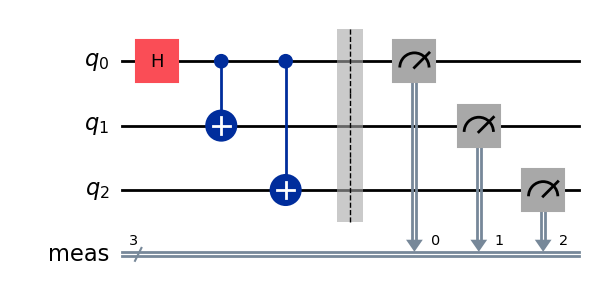

In [ ]:

ent_circ = QuantumCircuit(3)  # Create a quantum circuit with 3 qubits 

ent_circ.h(0)  # Apply Hadamard gate to qubit 0, creating superposition, 1/sqrt(2) (|0> +  |1>)

ent_circ.cx(0, 1) # CNOT gate to entangle qubit 0 with qubit 1, creating entanglement between them
ent_circ.cx(0, 2)  # CNOT gate to entangle qubit 0 with qubit 2, creating entanglement between them


#This will give us the state of the qubits after applying the gates
state = Statevector.from_instruction(ent_circ)
print(state)


#Add measurements to all qubits
ent_circ.measure_all()

#Use the StatevectorSampler for Simulation
sampler = StatevectorSampler()


# Number of shots (although it's a statevector simulation, this is a common parameter)
shots = 1000
job = sampler.run([ent_circ],shots = shots)


#get the result of the job
result = job.result()[0]


#print the measurement bitstrings
print(result.data.meas.get_bitstrings())

#Print the counts of the each measurements outcome
counts = result.data.meas.get_counts()
print("\nCounts of measurement outcomes:")
print(counts)


#calculate and print the probabilities of each outcome
prob_dict = {state : c / shots for state, c in counts.items()}
print("\nProbabilities of measurement outcomes:")
print(prob_dict)


#draw the circuit
ent_circ.draw("mpl")
